In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
from scipy.stats import skew,kurtosis
from scipy import stats

In [4]:
df=pd.read_csv('/content/drive/MyDrive/708 course/708 assessment 1/Customer_Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,1.0,2.0,DIAMOND,464.0
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,3.0,DIAMOND,456.0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,1.0,3.0,DIAMOND,377.0
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,5.0,GOLD,350.0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,5.0,GOLD,425.0


In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0,0.0,1.0,DIAMOND,300.0
9996,9997,15569892,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0,0.0,5.0,PLATINUM,771.0
9997,9998,15584532,Liu,709.0,France,Female,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,1.0,3.0,SILVER,564.0
9998,9999,15682355,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0,1.0,2.0,GOLD,339.0
9999,10000,15628319,Walker,792.0,France,Female,28.0,4.0,130142.79,1.0,1.0,0.0,38190.78,0.0,0.0,3.0,DIAMOND,911.0


In [6]:
df.isnull().sum()

RowNumber              0
CustomerId             0
Surname                4
CreditScore            4
Geography              4
Gender                 4
Age                    4
Tenure                 4
Balance                4
NumOfProducts          4
HasCrCard              4
IsActiveMember         4
EstimatedSalary       10
Exited                 4
Complain               4
Satisfaction Score     4
Card Type              4
Point Earned          12
dtype: int64

In [7]:
# Calculate the number of columns in the DataFrame
num_columns = len(df.columns)

# Calculate the threshold for null values
null_threshold = 0.8 * num_columns

# Drop rows where the number of null values is more than 80%
df_dropped_rows = df.dropna(thresh=null_threshold, axis=0)

# Calculate the number of rows dropped
rows_dropped = len(df) - len(df_dropped_rows)

print("Number of rows dropped:", rows_dropped)


Number of rows dropped: 4


In [8]:
df=df_dropped_rows
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       6
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          8
dtype: int64

In [9]:
#columns I want to impute
columns_to_impute = ['EstimatedSalary','Point Earned']

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df[columns_to_impute])
df[columns_to_impute] = imr.transform(df[columns_to_impute])

#check result
print(df.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


<ipython-input-9-6b2bb4698bd9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_impute] = imr.transform(df[columns_to_impute])


In [10]:
print(df.dtypes)

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore           float64
Geography              object
Gender                 object
Age                   float64
Tenure                float64
Balance               float64
NumOfProducts         float64
HasCrCard             float64
IsActiveMember        float64
EstimatedSalary       float64
Exited                float64
Complain              float64
Satisfaction Score    float64
Card Type              object
Point Earned          float64
dtype: object


In [11]:
# Perform one-hot encoding for multiple columns
columns_to_encode = ['Gender','Card Type']
df_encoded = pd.get_dummies(df[columns_to_encode],prefix=columns_to_encode,dtype=int)

df=pd.concat([df,df_encoded],axis=1)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Complain,Satisfaction Score,Card Type,Point Earned,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,...,1.0,2.0,DIAMOND,464.0,1,0,1,0,0,0
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,...,1.0,3.0,DIAMOND,456.0,1,0,1,0,0,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,...,1.0,3.0,DIAMOND,377.0,1,0,1,0,0,0
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,...,0.0,5.0,GOLD,350.0,1,0,0,1,0,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,...,0.0,5.0,GOLD,425.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2.0,...,0.0,1.0,DIAMOND,300.0,0,1,1,0,0,0
9996,9997,15569892,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,...,0.0,5.0,PLATINUM,771.0,0,1,0,0,1,0
9997,9998,15584532,Liu,709.0,France,Female,36.0,7.0,0.00,1.0,...,1.0,3.0,SILVER,564.0,1,0,0,0,0,1
9998,9999,15682355,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,...,1.0,2.0,GOLD,339.0,0,1,0,1,0,0


In [12]:
columns_to_drop=['Gender','Surname','RowNumber','CustomerId','Geography','Card Type']
df.drop(columns_to_drop,axis=1,inplace=True)

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,1.0,2.0,464.0,1,0,1,0,0,0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,3.0,456.0,1,0,1,0,0,0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,1.0,3.0,377.0,1,0,1,0,0,0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,5.0,350.0,1,0,0,1,0,0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,5.0,425.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0,0.0,1.0,300.0,0,1,1,0,0,0
9996,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0,0.0,5.0,771.0,0,1,0,0,1,0
9997,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,1.0,3.0,564.0,1,0,0,0,0,1
9998,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0,1.0,2.0,339.0,0,1,0,1,0,0


In [14]:
print(df.dtypes)

CreditScore           float64
Age                   float64
Tenure                float64
Balance               float64
NumOfProducts         float64
HasCrCard             float64
IsActiveMember        float64
EstimatedSalary       float64
Exited                float64
Complain              float64
Satisfaction Score    float64
Point Earned          float64
Gender_Female           int64
Gender_Male             int64
Card Type_DIAMOND       int64
Card Type_GOLD          int64
Card Type_PLATINUM      int64
Card Type_SILVER        int64
dtype: object


Skewness:
CreditScore   -0.071948
Age            1.013677
Balance       -0.141157
dtype: float64


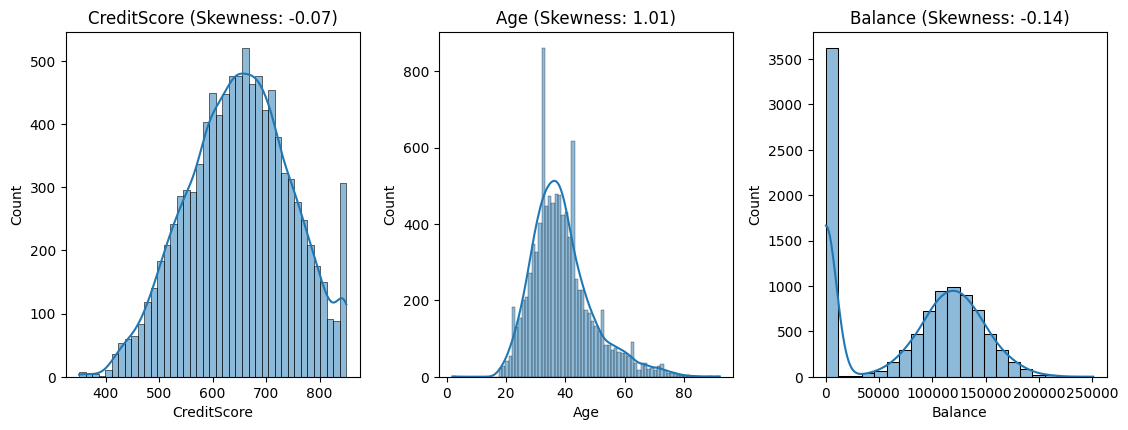

In [15]:
# Get the list of continuous variable names
continuous_vars = ['CreditScore', 'Age', 'Balance']

# Calculate skewness
skewness = df[continuous_vars].skew()

print('Skewness:')
print(skewness)

# Visualize skewness with histograms
plt.figure(figsize=(15, 8))
for column in continuous_vars:
    plt.subplot(2, 4, continuous_vars.index(column) + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column + f' (Skewness: {skewness[column]:.2f})')
plt.tight_layout()
plt.show()


In [16]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,650.543717,38.923669,5.012805,76488.911624,1.530112,0.705482,0.515006,100132.689858,0.203782,0.204482,3.013806,606.679015,0.454282,0.545718,0.250800,0.250100,0.249600,0.249500
std,96.666557,10.522216,2.892061,62394.425148,0.581690,0.455849,0.499800,57487.624280,0.402829,0.403343,1.405986,225.787265,0.497930,0.497930,0.433495,0.433092,0.432803,0.432745
min,350.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51113.055000,0.000000,0.000000,2.000000,411.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100218.210000,0.000000,0.000000,3.000000,605.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127639.372500,2.000000,1.000000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Calculate Z-scores for each numerical variable
z_scores = stats.zscore(df)

# Define a threshold for outlier detection
threshold = 3

# Find outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Get the indices of outlier rows
outlier_indices = outliers.any(axis=1)

# Drop outlier rows using the indices
df = df[~outlier_indices]

print("Number of outliers removed:", outlier_indices.sum())

Number of outliers removed: 205


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9791 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         9791 non-null   float64
 1   Age                 9791 non-null   float64
 2   Tenure              9791 non-null   float64
 3   Balance             9791 non-null   float64
 4   NumOfProducts       9791 non-null   float64
 5   HasCrCard           9791 non-null   float64
 6   IsActiveMember      9791 non-null   float64
 7   EstimatedSalary     9791 non-null   float64
 8   Exited              9791 non-null   float64
 9   Complain            9791 non-null   float64
 10  Satisfaction Score  9791 non-null   float64
 11  Point Earned        9791 non-null   float64
 12  Gender_Female       9791 non-null   int64  
 13  Gender_Male         9791 non-null   int64  
 14  Card Type_DIAMOND   9791 non-null   int64  
 15  Card Type_GOLD      9791 non-null   int64  
 16  Card Type_P

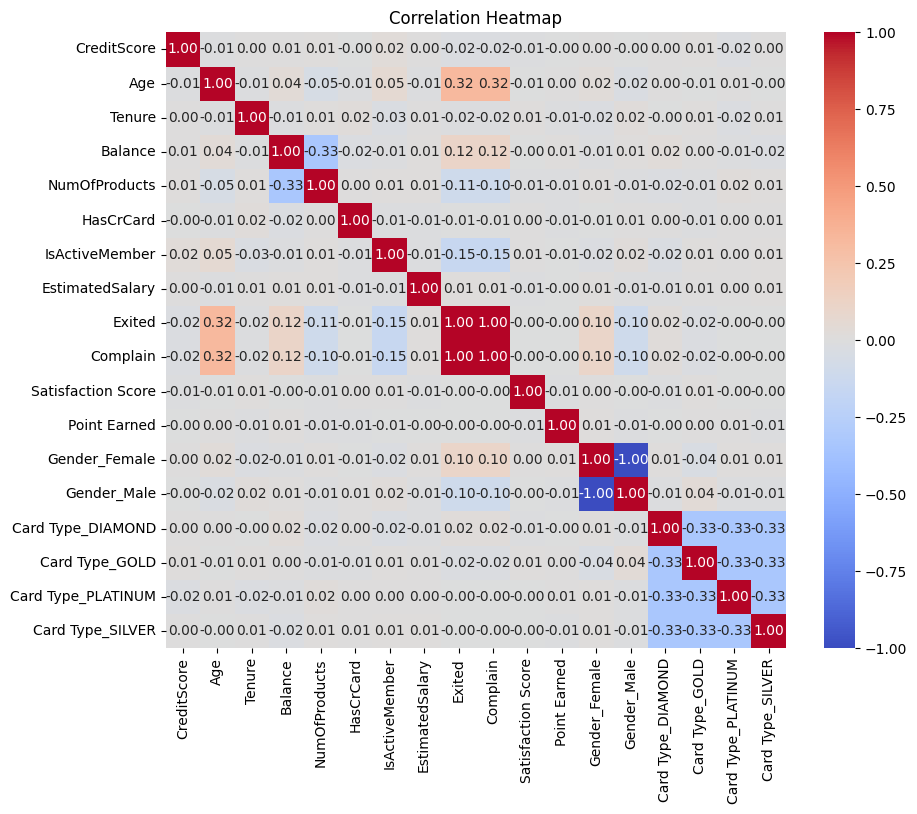

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [20]:
df=df.drop('Complain',axis=1)

Text(0.5, 1.0, 'NumOfProducts and Exited')

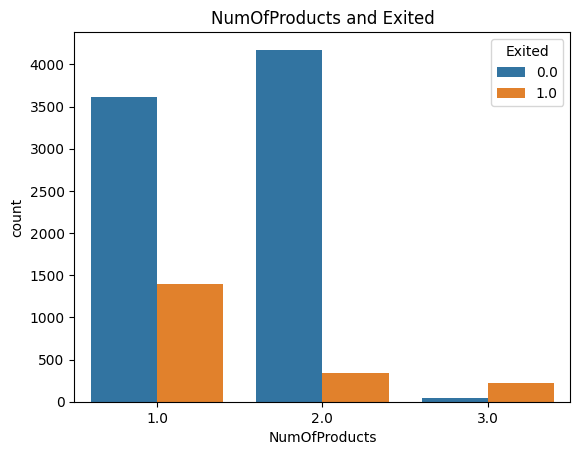

In [21]:
sns.countplot(x='NumOfProducts',hue='Exited',data=df)
plt.title('NumOfProducts and Exited')

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Separate features (X) and target variable (Y)
X = df.drop(columns=['Exited'])
Y = df['Exited']

In [24]:
# Initialize SelectKBest with f_classif scoring and k=5 (top 5 features)
feature_selector = SelectKBest(score_func=f_classif, k=5)

# Fit SelectKBest to the data
fit = feature_selector.fit(X, Y)

# Get the indices of the selected features
selected_features_indices = fit.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_features_indices]

# Print the names of the selected features
print("Selected features:", selected_feature_names)
print("Feature scores:", feature_selector.scores_)

Selected features: Index(['Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Gender_Female'], dtype='object')
Feature scores: [4.74445002e+00 1.14062812e+03 2.31346187e+00 1.33985873e+02
 1.10459682e+02 4.46597930e-01 2.37481116e+02 9.35643454e-01
 3.23014876e-02 2.40933763e-01 1.07428979e+02 1.07428979e+02
 4.46761543e+00 2.78288384e+00 1.04365018e-02 1.20270314e-01]


In [25]:
# Get the indices of the K most significant features
k_most_significant_indices = selected_features_indices[:5]

# Subset the feature matrix with the K most significant features
X_selected = X.iloc[:, k_most_significant_indices]

# Print the shape of the new feature matrix
print("Shape of the selected feature matrix:", X_selected.shape)


Shape of the selected feature matrix: (9791, 5)


In [26]:
# Split the data into training and testing sets
pred_train, pred_test, tar_train, tar_test = train_test_split(X_selected, Y, test_size=0.3, random_state=20)

# Initialize the logistic regression model
logreg = LogisticRegression(random_state=2)

# Fit the model to the training data
logreg.fit(pred_train, tar_train)

# Make predictions on the testing data
predictions = logreg.predict(pred_test)

# Compute accuracy score
accuracy = accuracy_score(tar_test, predictions)

# Print the accuracy score
print("Accuracy score of the SelectKBest features: %.2f" % accuracy)


Accuracy score of the SelectKBest features: 0.81


In [27]:
# Initialize logistic regression model
logreg = LogisticRegression(max_iter=2000)

# Initialize RFE with the logistic regression model and the desired number of features
rfe = RFE(estimator=logreg, n_features_to_select=5)

# Fit RFE to the data
rfe.fit(X, Y)

# Get the indices of the selected features
selected_features_indices = rfe.support_

# Get the names of the selected features
selected_features_names = X.columns[selected_features_indices]

print("Selected features:", selected_features_names)

# Select only the selected features
X_selected = X.loc[:, selected_features_names]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.3, random_state=42)

# Train a logistic regression model using the selected features
logreg_rfe = LogisticRegression(max_iter=2000)
logreg_rfe.fit(X_train, Y_train)

# Make predictions on the testing data
predictions_rfe = logreg_rfe.predict(X_test)

# Compute accuracy score
accuracy_rfe = accuracy_score(Y_test, predictions_rfe)

# Print the accuracy score
print("Accuracy score of the model with RFE selection: %.2f" % accuracy_rfe)


Selected features: Index(['NumOfProducts', 'IsActiveMember', 'Gender_Female', 'Gender_Male',
       'Card Type_DIAMOND'],
      dtype='object')
Accuracy score of the model with RFE selection: 0.80


In [28]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
count,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000
mean,650.604637,38.383209,5.010724,76473.492079,1.515269,0.705342,0.509856,100050.384179,0.199980,3.013277,606.701198,0.452456,0.547544,0.250638,0.249004,0.249617,0.250740
std,96.364888,9.663174,2.890580,62407.438977,0.550927,0.455912,0.499928,57468.872659,0.400005,1.405384,225.756752,0.497760,0.497760,0.433403,0.432458,0.432813,0.433462
min,363.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,1.000000,119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51106.180000,0.000000,2.000000,411.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97133.920000,1.000000,1.000000,1.000000,100132.689858,0.000000,3.000000,605.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,718.000000,43.000000,7.000000,127634.770000,2.000000,1.000000,1.000000,149376.125000,0.000000,4.000000,800.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,850.000000,70.000000,10.000000,250898.090000,3.000000,1.000000,1.000000,199992.480000,1.000000,5.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Get the column names of the dataframe
columns = ['Age', 'Balance', 'IsActiveMember', 'Gender_Female', 'NumOfProducts','Exited']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalised_df = scaler.fit_transform(df[columns])

# Convert the normalized data array into a DataFrame
My_normalised_df = pd.DataFrame(data=normalised_df, columns=columns)

# Display the normalized DataFrame
My_normalised_df.head()

,Age,Balance,IsActiveMember,Gender_Female,NumOfProducts,Exited
0,0.461538,0.000000,1.0,1.0,0.0,1.0
1,0.442308,0.334031,1.0,1.0,0.0,0.0
2,0.461538,0.636357,0.0,1.0,1.0,1.0
3,0.403846,0.000000,0.0,1.0,0.5,0.0
4,0.480769,0.500246,1.0,1.0,0.0,0.0


In [30]:
from sklearn.metrics import accuracy_score, classification_report

In [31]:
x=My_normalised_df[['Age', 'Balance', 'IsActiveMember', 'Gender_Female', 'NumOfProducts']]
y=My_normalised_df['Exited']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.820285908781484
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      2368
         1.0       0.61      0.20      0.30       570

    accuracy                           0.82      2938
   macro avg       0.72      0.59      0.60      2938
weighted avg       0.79      0.82      0.78      2938

